In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt  

In [39]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_density.csv') as Shrewsbury_parcel:
    df_Shrewsbury_parcel=pd.read_csv(Shrewsbury_parcel)

In [40]:
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('AVE', 'AVENUE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('BLVD','BOULEVARD')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('CIR','CIRCLE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('CT','COURT')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('CV','COVE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('DR','DRIVE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('LN','LANE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('PKWY','PARKWAY')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('PL','PLACE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('RD','ROAD')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('ST','STREET')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('TER','TERRACE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('TPKE','TURNPIKE')
df_Shrewsbury_parcel['FULL_STR']=df_Shrewsbury_parcel['FULL_STR'].str.replace('DR','DRIVE')

In [41]:
df_Shrewsbury_parcel['FULL_STR']

0                   VINNIE WAY
1        S QUINSIGAMOND AVENUE
2                   FLAGG ROAD
3         RAWSON HILL DRIVEIVE
4         RAWSON HILL DRIVEIVE
                 ...          
27514                      NaN
27515                      NaN
27516           CYPRESS AVENUE
27517              MAIN STREET
27518         MAIN BOULEVAROAD
Name: FULL_STR, Length: 27519, dtype: object

In [ ]:
FULL_STR=df_Shrewsbury_parcel.FULL_STR.sort_values().unique()
FULL_STR

array(['ABBY LN', 'ACORN ST', 'ADAMS FARM RD', 'ADAMS RD', 'ADIN DR',
       'AFRA DR', 'ALDEN AVE', 'ALICE AVE', 'ALMONDWOOD CIR',
       'ALTHEA PATH', 'AMBERLY LN', 'AMHERST RD', 'ANGELA AVE',
       'ANGLIN LN', 'APPALOOSA DR', 'APPLE SEED DR', 'APPLEWOOD CIR',
       'ARBOR CIR', 'ARBOR DR', 'ARCH ST', 'ARCTURUS DR', 'ARGILA LN',
       'ARNOLD RD', 'ARROWWOOD DR', 'ARTEMAS AVE', 'ASHLEY DR',
       'ASHMONT ST', 'ASHTON DR', 'ASHWOOD CIR', 'ASPEN RD', 'ATWOOD LN',
       'AUDUBON DR', 'AVALON WAY', 'AVON AVE', 'AVON DR', 'BAGLEY AVE',
       'BAILEY RD', 'BAKER AVE', 'BALDWIN CIR', 'BALSAM CIR',
       'BANNISTER ST', 'BARNARD ST', 'BARROWS RD', 'BAY RD',
       'BAY VIEW DR', 'BAYBERRY CIR', 'BEACH ISLAND', 'BEACH RD',
       'BEACON ST', 'BEAVER DR', 'BECKET ST', 'BELLINGHAM WAY',
       'BELLRIDGE DR', 'BENJAMIN LN', 'BENTON ST', 'BERKSHIRE RD',
       'BETHS RD', 'BEVERLY HILL DR', 'BEVERLY RD', 'BIRCH BRUSH RD',
       'BIRCH LN', 'BIRCHWOOD DR', 'BITTERSWEET CIR', 'BLACKSTO

In [ ]:
parcel=[]
for i in FULL_STR:
    df=df_Shrewsbury_parcel.loc[df_Shrewsbury_parcel.FULL_STR==i]
    parcel.append(len(df.index))
#parcel

In [ ]:
len(parcel)

707

In [ ]:
#FULL_STR.remove('BRIDLE PATH (WORCESTER)')

In [ ]:
FULL_STR

array(['ABBY LN', 'ACORN ST', 'ADAMS FARM RD', 'ADAMS RD', 'ADIN DR',
       'AFRA DR', 'ALDEN AVE', 'ALICE AVE', 'ALMONDWOOD CIR',
       'ALTHEA PATH', 'AMBERLY LN', 'AMHERST RD', 'ANGELA AVE',
       'ANGLIN LN', 'APPALOOSA DR', 'APPLE SEED DR', 'APPLEWOOD CIR',
       'ARBOR CIR', 'ARBOR DR', 'ARCH ST', 'ARCTURUS DR', 'ARGILA LN',
       'ARNOLD RD', 'ARROWWOOD DR', 'ARTEMAS AVE', 'ASHLEY DR',
       'ASHMONT ST', 'ASHTON DR', 'ASHWOOD CIR', 'ASPEN RD', 'ATWOOD LN',
       'AUDUBON DR', 'AVALON WAY', 'AVON AVE', 'AVON DR', 'BAGLEY AVE',
       'BAILEY RD', 'BAKER AVE', 'BALDWIN CIR', 'BALSAM CIR',
       'BANNISTER ST', 'BARNARD ST', 'BARROWS RD', 'BAY RD',
       'BAY VIEW DR', 'BAYBERRY CIR', 'BEACH ISLAND', 'BEACH RD',
       'BEACON ST', 'BEAVER DR', 'BECKET ST', 'BELLINGHAM WAY',
       'BELLRIDGE DR', 'BENJAMIN LN', 'BENTON ST', 'BERKSHIRE RD',
       'BETHS RD', 'BEVERLY HILL DR', 'BEVERLY RD', 'BIRCH BRUSH RD',
       'BIRCH LN', 'BIRCHWOOD DR', 'BITTERSWEET CIR', 'BLACKSTO

In [ ]:
FULL_STR = FULL_STR.tolist()

In [ ]:
FULL_STR.remove('BRIDLE PATH (WORCESTER)')

In [ ]:
words=[]
for i in range(len(FULL_STR)):
    current=FULL_STR[i]
    current2=str(current).split()
    words.append(current2[-1])
#words.unique()
# insert the list to the set
words_set = set(words)
# convert the set to the list
#unique_words_set = (list(words_set))
words_set

{'AVE',
 'BLVD',
 'BROADWAY',
 'CIR',
 'CT',
 'CV',
 'DR',
 'FL`D',
 'HOLLOW',
 'IS',
 'ISLAND',
 'LN',
 'PATH',
 'PKWY',
 'PL',
 'PT',
 'RD',
 'ROW',
 'ST',
 'TER',
 'TPKE',
 'W',
 'WAY',
 'WORC.',
 'nan'}

In [ ]:
for word in words:
    new_string = string.replace("a", "1")
    

In [ ]:
for element in words:
    if element=='AVE':
        element=='AVENUE'
    if element=='BLVD':
        element=='BOULEVARD'
    if element=='CIR':
        element=='CIRCLE'
    if element=='CT':
        element=='COURT'
    if element=='CV':
        element=='COVE'
    if element=='DR':
        element=='DRIVE'
    if element=='LN':
        element=='LANE'
    if element=='PARKWAY':
        element=='PARKWAY'
    if element=='PL':
        element=='PLACE'
    if element=='RD':
        element=='ROAD'
    if element=='ST':
        element=='STREET'
    if element=='TER':
        element=='TERRACE'
    if element=='TPKE':
        element=='TURNPIKE'
    else:
        pass
words

['LN',
 'ST',
 'RD',
 'RD',
 'DR',
 'DR',
 'AVE',
 'AVE',
 'CIR',
 'PATH',
 'LN',
 'RD',
 'AVE',
 'LN',
 'DR',
 'DR',
 'CIR',
 'CIR',
 'DR',
 'ST',
 'DR',
 'LN',
 'RD',
 'DR',
 'AVE',
 'DR',
 'ST',
 'DR',
 'CIR',
 'RD',
 'LN',
 'DR',
 'WAY',
 'AVE',
 'DR',
 'AVE',
 'RD',
 'AVE',
 'CIR',
 'CIR',
 'ST',
 'ST',
 'RD',
 'RD',
 'DR',
 'CIR',
 'ISLAND',
 'RD',
 'ST',
 'DR',
 'ST',
 'WAY',
 'DR',
 'LN',
 'ST',
 'RD',
 'RD',
 'DR',
 'RD',
 'RD',
 'LN',
 'DR',
 'CIR',
 'ST',
 'RD',
 'ISLAND',
 'DR',
 'LN',
 'LN',
 'DR',
 'CIR',
 'TPKE',
 'RD',
 'DR',
 'ST',
 'DR',
 'CIR',
 'ST',
 'RD',
 'DR',
 'PATH',
 'AVE',
 'BROADWAY',
 'ST',
 'CIR',
 'PKWY',
 'PL',
 'DR',
 'CIR',
 'RD',
 'RD',
 'AVE',
 'AVE',
 'CIR',
 'CIR',
 'RD',
 'ST',
 'DR',
 'DR',
 'ST',
 'WAY',
 'DR',
 'CIR',
 'ST',
 'AVE',
 'RD',
 'CIR',
 'RD',
 'AVE',
 'RD',
 'DR',
 'RD',
 'BLVD',
 'DR',
 'CT',
 'RD',
 'ST',
 'CIR',
 'TER',
 'LN',
 'RD',
 'ST',
 'ST',
 'ST',
 'RD',
 'RD',
 'DR',
 'CIR',
 'WAY',
 'RD',
 'ST',
 'ST',
 'CIR',
 'RD',
 '

In [ ]:
df['name'].sort_values().unique()

NameError: name 'df' is not defined

In [210]:
import geopandas as gpd
df = gpd.read_file(r'../../data/raw/Shrewsbury/edges.shp')

In [211]:
df.to_csv(r'../../results/outcomes/check.csv', index = False)

In [212]:
df

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,width,length,from,to,access,bridge,geometry
0,69008159,71718041,0,455364322,0,2,US 20,Hartford Turnpike,primary,50 mph,18.3,183.974,71718041,69008159,None,None,"LINESTRING (-71.67313 42.27914, -71.67295 42.2..."
1,71375134,71532963,0,9414802,0,None,None,Harrington Farms Way,residential,None,None,60.788,71532963,71375134,None,None,"LINESTRING (-71.71240 42.27993, -71.71176 42.2..."
2,71375134,71587232,0,9415013,0,2,MA 140,Grafton Street,primary,35 mph,12.2,67.963,71587232,71375134,None,None,"LINESTRING (-71.71186 42.28065, -71.71184 42.2..."
3,71375134,71528522,0,9415013,0,2,MA 140,Grafton Street,primary,35 mph,12.2,77.214,71528522,71375134,None,None,"LINESTRING (-71.71128 42.27943, -71.71147 42.2..."
4,71375244,71663146,0,9414427,1,2,MA 9,Boston Turnpike,trunk,45 mph,30.2,106.263,71375244,71663146,None,None,"LINESTRING (-71.73834 42.27567, -71.73870 42.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6907824676,6907824676,0,737777927,0,1,None,None,residential,None,9.1,81.621,6907824676,6907824676,None,None,"LINESTRING (-71.73886 42.26837, -71.73884 42.2..."
1996,7911774073,7911774080,0,847854609,0,None,None,None,residential,None,None,12.821,7911774080,7911774073,None,None,"LINESTRING (-71.75289 42.27681, -71.75274 42.2..."
1997,7911774079,7911774080,0,"[847854609, 847854611]",0,None,None,Lakeside Path,residential,None,None,95.404,7911774080,7911774079,None,None,"LINESTRING (-71.75289 42.27681, -71.75311 42.2..."
1998,7911774080,7911774081,0,847854610,0,None,None,None,residential,None,None,9.655,7911774081,7911774080,None,None,"LINESTRING (-71.75286 42.27673, -71.75289 42.2..."


In [213]:
df['name']

0          Hartford Turnpike
1       Harrington Farms Way
2             Grafton Street
3             Grafton Street
4            Boston Turnpike
                ...         
1995                    None
1996                    None
1997           Lakeside Path
1998                    None
1999                    None
Name: name, Length: 2000, dtype: object

In [214]:
df['name']=df['name'].str.upper()

In [215]:
df['name']

0          HARTFORD TURNPIKE
1       HARRINGTON FARMS WAY
2             GRAFTON STREET
3             GRAFTON STREET
4            BOSTON TURNPIKE
                ...         
1995                    None
1996                    None
1997           LAKESIDE PATH
1998                    None
1999                    None
Name: name, Length: 2000, dtype: object

In [216]:
#df_length = pd.DataFrame({'FULL_STR' : [],'Length' : []})
street_name=[]
length=[]
for i in range(len(FULL_STR)):
    A=df['length'].loc[df.name==FULL_STR[i]].tolist()
    B=FULL_STR[i]
    if not A:
        pass
    else:
        street_name.append(FULL_STR[i])
        length.append(sum(A))
        #print(A)
        #df_length.loc[df.shape[0]] = [FULL_STR[i],sum(A)]

In [217]:
d = {'FULL_STR':street_name,'length':length}
df_FULL_STR_length = pd.DataFrame(d)
df_FULL_STR_length

,FULL_STR,length
0,VINNIE WAY,284.518
1,NORTON WAY,155.145
2,HAPGOOD WAY,770.531
3,COUNTRY WAY,546.203
4,MINUTEMAN WAY,870.052
5,GROVE RIDGE PATH,86.041
6,IVY PATH,315.715
7,COLONIAL WAY,194.513
8,OAK RIDGE WAY,375.583
9,BRIDLE PATH,731.779


In [149]:
parcel_new=[]
FULL_STR_new=df_FULL_STR_length['FULL_STR'].tolist()
#print(FULL_STR_new)
for i in FULL_STR_new:
    df3=df_Shrewsbury_parcel.loc[df_Shrewsbury_parcel.FULL_STR==i]
    parcel_new.append(len(df3.index))
#parcel_new

In [151]:
df_FULL_STR_length['parcels'] = parcel_new

In [158]:
df_FULL_STR_length

,FULL_STR,length,parcels
0,VINNIE WAY,284.518,30
1,NORTON WAY,155.145,12
2,HAPGOOD WAY,770.531,66
3,COUNTRY WAY,546.203,21
4,MINUTEMAN WAY,870.052,74
5,GROVE RIDGE PATH,86.041,10
6,IVY PATH,315.715,18
7,COLONIAL WAY,194.513,17
8,OAK RIDGE WAY,375.583,33
9,BRIDLE PATH,731.779,45


In [161]:
df_FULL_STR_length['density'] = df_FULL_STR_length['parcels']/df_FULL_STR_length['length']
df_FULL_STR_length['log_density'] = np.log10(df_FULL_STR_length['density'])

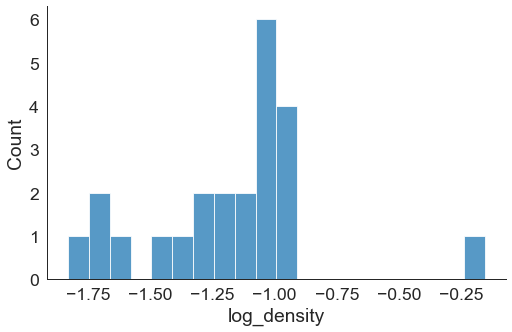

In [166]:
# plotting histogram for density of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_FULL_STR_length['log_density'], kind="hist", bins = 20, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
burr,131.063642,257.791344,52.566319,inf
norm,138.070875,205.296808,47.493266,inf
gamma,140.123891,196.113721,50.968236,inf
lognorm,140.199691,195.946957,50.980674,inf
beta,140.496564,196.123238,54.164820,inf


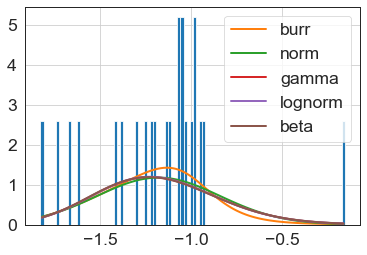

In [168]:
f = Fitter(df_FULL_STR_length['log_density'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [170]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 9.668795233828714,
  'd': 0.2653292095746095,
  'loc': -2.0443161030463983,
  'scale': 1.1102828709967507}}

In [171]:
f.fitted_param["burr"]

(9.668795233828714,
 0.2653292095746095,
 -2.0443161030463983,
 1.1102828709967507)

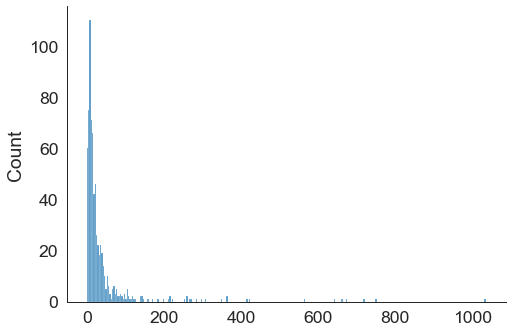

In [133]:
# plotting histogram for # of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=parcel, kind="hist", bins = 300, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
lognorm,0.000050,2179.421210,-11624.557253,inf
beta,0.000051,5813.361034,-11599.468446,inf
burr,0.000070,2034.128036,-11377.602055,inf
norm,0.001415,5076.932758,-9263.639488,inf
gamma,0.001913,28272.109485,-9044.017691,inf


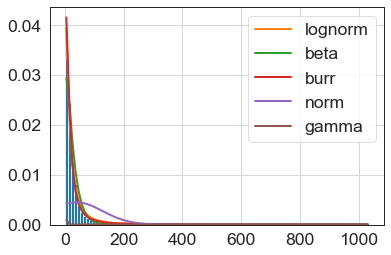

In [44]:
f = Fitter(parcel,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [47]:
# We can see that the lognorm distribution is the best fit based on the sumsquare_error criteria.

In [48]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 1.1823428153991393,
  'loc': -0.1886494756247153,
  'scale': 16.81071768144596}}

In [49]:
f.fitted_param["lognorm"]

(1.1823428153991393, -0.1886494756247153, 16.81071768144596)